In [49]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.array([[1, 1],[0.2, 0.2],[0.9, 0.5]])
x2 = np.array([[-1,-1],[0,0.5],[0.1,0.5]])
data= np.concatenate((x1, x2), axis=0) # data is 6 rows and 2 columns
# data = data - np.mean(data,axis=0) # will make data mean = 0
print(data)
y=[1,1,1,-1,-1,-1]
print(y)

[[ 1.   1. ]
 [ 0.2  0.2]
 [ 0.9  0.5]
 [-1.  -1. ]
 [ 0.   0.5]
 [ 0.1  0.5]]
[1, 1, 1, -1, -1, -1]


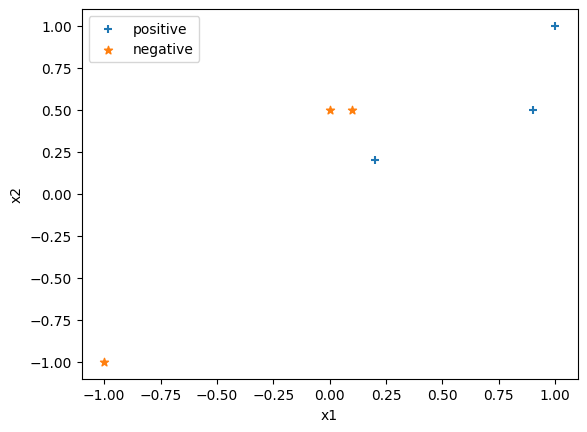

In [39]:
plt.scatter(np.array(data[0:3,0]), np.array(data[0:3,1]), marker='+', label='positive')
plt.scatter(np.array(data[3:,0]), np.array(data[3:,1]), marker='*', label='negative')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [135]:
correctClassified = 0
w = np.random.rand(2,1) # Randomly initialize w
w = np.append(w,1) # append w0=1
w = np.array([1, 1])
print(w)

[1 1]


In [136]:
step_count = 0
w_history = [[1, 1]]
while (correctClassified != len(data)): #Until everything is classified
  for sample in range(len(data)):
    x = data[sample,0:2]
    print("Current prediction: {}".format(np.dot(np.transpose(w),x)))
    if y[sample]==1: #Sample is positive (orange)
       if np.dot(np.transpose(w),x)>=0: #WX >= 0
         correctClassified=correctClassified+1
         print("sample is pos")
       else: #orange is classified as apple
          print("Updating w: {} with wrong +ve preds:{} ".format(w, x))
          w=w+x
          print(w)
    else: #Sample is Negative (apple)
         if np.dot(np.transpose(w),x)<0: # WX < 0
           correctClassified=correctClassified+1
           print("sample is neg")
         else: #apple is classified as orange
           print("Updating w: {} with wrong -ve preds:{} ".format(w, x))
           w=w-x
           print(w)
  if(correctClassified != len(data)):
      correctClassified=0
      w_history.append(w)
      step_count += 1           
      print("Step Count: {}".format(step_count))
  

print(w)      

Current prediction: 2.0
sample is pos
Current prediction: 0.4
sample is pos
Current prediction: 1.4
sample is pos
Current prediction: -2.0
sample is neg
Current prediction: 0.5
Updating w: [1 1] with wrong -ve preds:[0.  0.5] 
[1.  0.5]
Current prediction: 0.35
Updating w: [1.  0.5] with wrong -ve preds:[0.1 0.5] 
[0.9 0. ]
Step Count: 1
Current prediction: 0.9
sample is pos
Current prediction: 0.18000000000000002
sample is pos
Current prediction: 0.81
sample is pos
Current prediction: -0.9
sample is neg
Current prediction: 0.0
Updating w: [0.9 0. ] with wrong -ve preds:[0.  0.5] 
[ 0.9 -0.5]
Current prediction: -0.15999999999999998
sample is neg
Step Count: 2
Current prediction: 0.4
sample is pos
Current prediction: 0.08000000000000002
sample is pos
Current prediction: 0.56
sample is pos
Current prediction: -0.4
sample is neg
Current prediction: -0.25
sample is neg
Current prediction: -0.15999999999999998
sample is neg
[ 0.9 -0.5]


In [139]:
def plot_decision_boundary(w, axis):
  axis.scatter(np.array(data[0:3,0]), np.array(data[0:3,1]), marker='+', label='positive')
  axis.scatter(np.array(data[3:,0]), np.array(data[3:,1]), marker='*', label='negative')
  axis.plot(np.dot(np.transpose(w),data[0]))
  x1_vals = np.array([np.min(x1[:, 0]), np.max(x1[:, 0])])
  if w[1] == 0:
    x2_vals = (- w[0]*x1_vals) / (w[1]+1e-4)
  else:
    x2_vals = (- w[0]*x1_vals) / w[1]
  print(x1_vals, x2_vals)
  axis.plot(x1_vals, x2_vals, 'r-', label='Decision Boundary')
  axis.axline(xy1=(x1_vals[0], x2_vals[0]), xy2=(x1_vals[1], x2_vals[1]), color='r')

  # axis.xlabel('x1')
  # axis.ylabel('x2')
  # axis.legend()
  axis.set_title(w)

[0.2 1. ] [-0.2 -1. ]
[0.2 1. ] [-1800. -9000.]
[0.2 1. ] [0.36 1.8 ]


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


[]

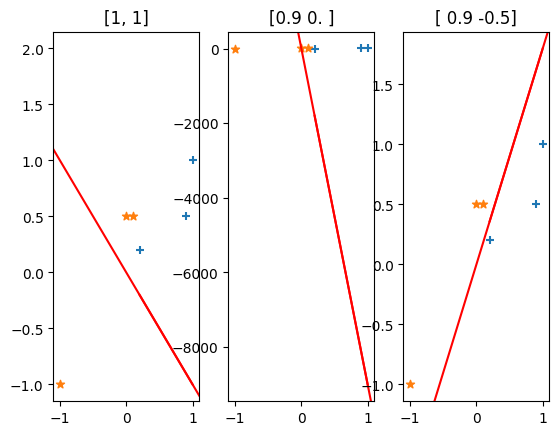

In [140]:
if np.sqrt(len(w_history)) % 1 != 0:
    figure, axis = plt.subplots(1, len(w_history))
    for i in range(len(w_history)):
        plot_decision_boundary(w_history[i], axis[i])
else:
    figure, axis = plt.subplots(np.sqrt(w_history), np.sqrt(w_history))

plt.plot()

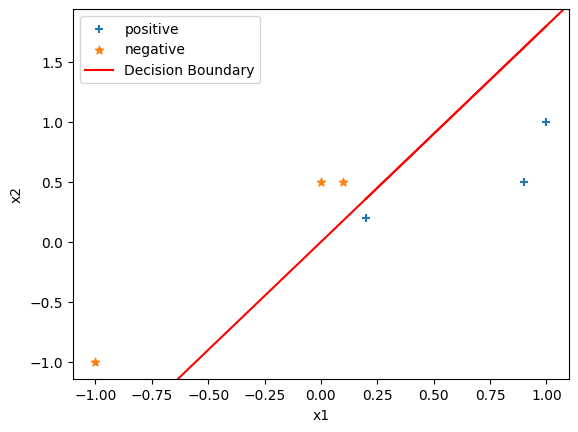

In [71]:
plt.scatter(np.array(data[0:3,0]), np.array(data[0:3,1]), marker='+', label='positive')
plt.scatter(np.array(data[3:,0]), np.array(data[3:,1]), marker='*', label='negative')
plt.plot(np.dot(np.transpose(w),data[0]))
x1_vals = np.array([np.min(x1[:, 0]), np.max(x1[:, 0])])
x2_vals = (- w[0]*x1_vals) / w[1]
plt.plot(x1_vals, x2_vals, 'r-', label='Decision Boundary')
plt.axline(xy1=(x1_vals[0], x2_vals[0]), xy2=(x1_vals[1], x2_vals[1]), color='r')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()